# introductory text (explain: dataset, task)

Using the communities and crime dataset from UCI, predict whereother or not a town has high levels of crime based on features of the population

# import requisite modules

In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import pairplot
from sklearn.metrics import *
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# helper functions (if necessary)

In [225]:
def DTGenerator(X,y,dT):
    if dT is None:
        dT=DecisionTreeClassifier(max_depth=4, max_leaf_nodes=18)
    dT=dT.fit(X,y)
    y_pred = dT.predict(X)
    rec=recall_score(y,y_pred,average=None)
    pre=precision_score(y,y_pred,average=None)
    cross_fold = pd.DataFrame(columns=['Precision', 'Recall', 'Accuracy'])
    cross_fold.Precision=cross_val_score(dT,X,y,cv=5,scoring='precision')
    cross_fold.Recall=cross_val_score(dT,X,y,cv=5,scoring='recall')
    cross_fold.Accuracy=cross_val_score(dT,X,y,cv=5,scoring='accuracy')
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_title("Decision Tree results")
    keys = ['accuracy','recall','precision']
    values = [cross_fold.Accuracy[0]*100,cross_fold.Recall[0]*100,cross_fold.Precision[0]*100]
    ax.bar(keys,values)
    for bar in ax.containers:
        ax.bar_label(bar)
    plt.show()
def NBGenerator(X,y,gnb):
    if gnb is None:
        gnb = GaussianNB()
    gnb.fit(X,y)
    gnbpred_values = gnb.predict(X)
    gnb_accuracy = accuracy_score(gnbpred_values,y)
    gnb_prec = precision_score(gnbpred_values,y,average=None)
    gnb_recall = recall_score(gnbpred_values,y,average=None)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_title("Gaussian Naive Bayes results")
    keys = ['accuracy','recall','precision']
    values = [gnb_accuracy*100,gnb_recall[0]*100,gnb_prec[0]*100]
    ax.bar(keys,values)
    for bar in ax.containers:
        ax.bar_label(bar)
    plt.show()
def KNNGenerator(X,y,knn):
    if knn is None:
        knn = KNeighborsClassifier(n_neighbors=5)
    knnpred_values = cross_val_predict(knn,X,y,cv=5)
    knn.fit(X,y)
    acc_score = []
    prec_score = []
    recal_score = []
    acc = accuracy_score(knnpred_values,y)
    prec = precision_score(y,knnpred_values,average=None)
    recall = recall_score(y,knnpred_values,average=None)
    acc_score.append(acc*100)
    prec_score.append(prec*100)
    recal_score.append(recall*100)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_title("K Nearest Neighbors results")
    keys = ['accuracy','recall','precision']
    values = [acc_score[0],prec_score[0][1],recal_score[0][0]]
    ax.bar(keys,values)
    for bar in ax.containers:
        ax.bar_label(bar)
    plt.show()
def plotCorrelationMatrix(df, graphWidth,title):
    filename = str(title)
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr() * 100
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
def defineHighCrime(df):
    if df['ViolentCrimesPerPop'] > 0.1:
        return True
    else:
        return False

# pre-process, analyze dataset

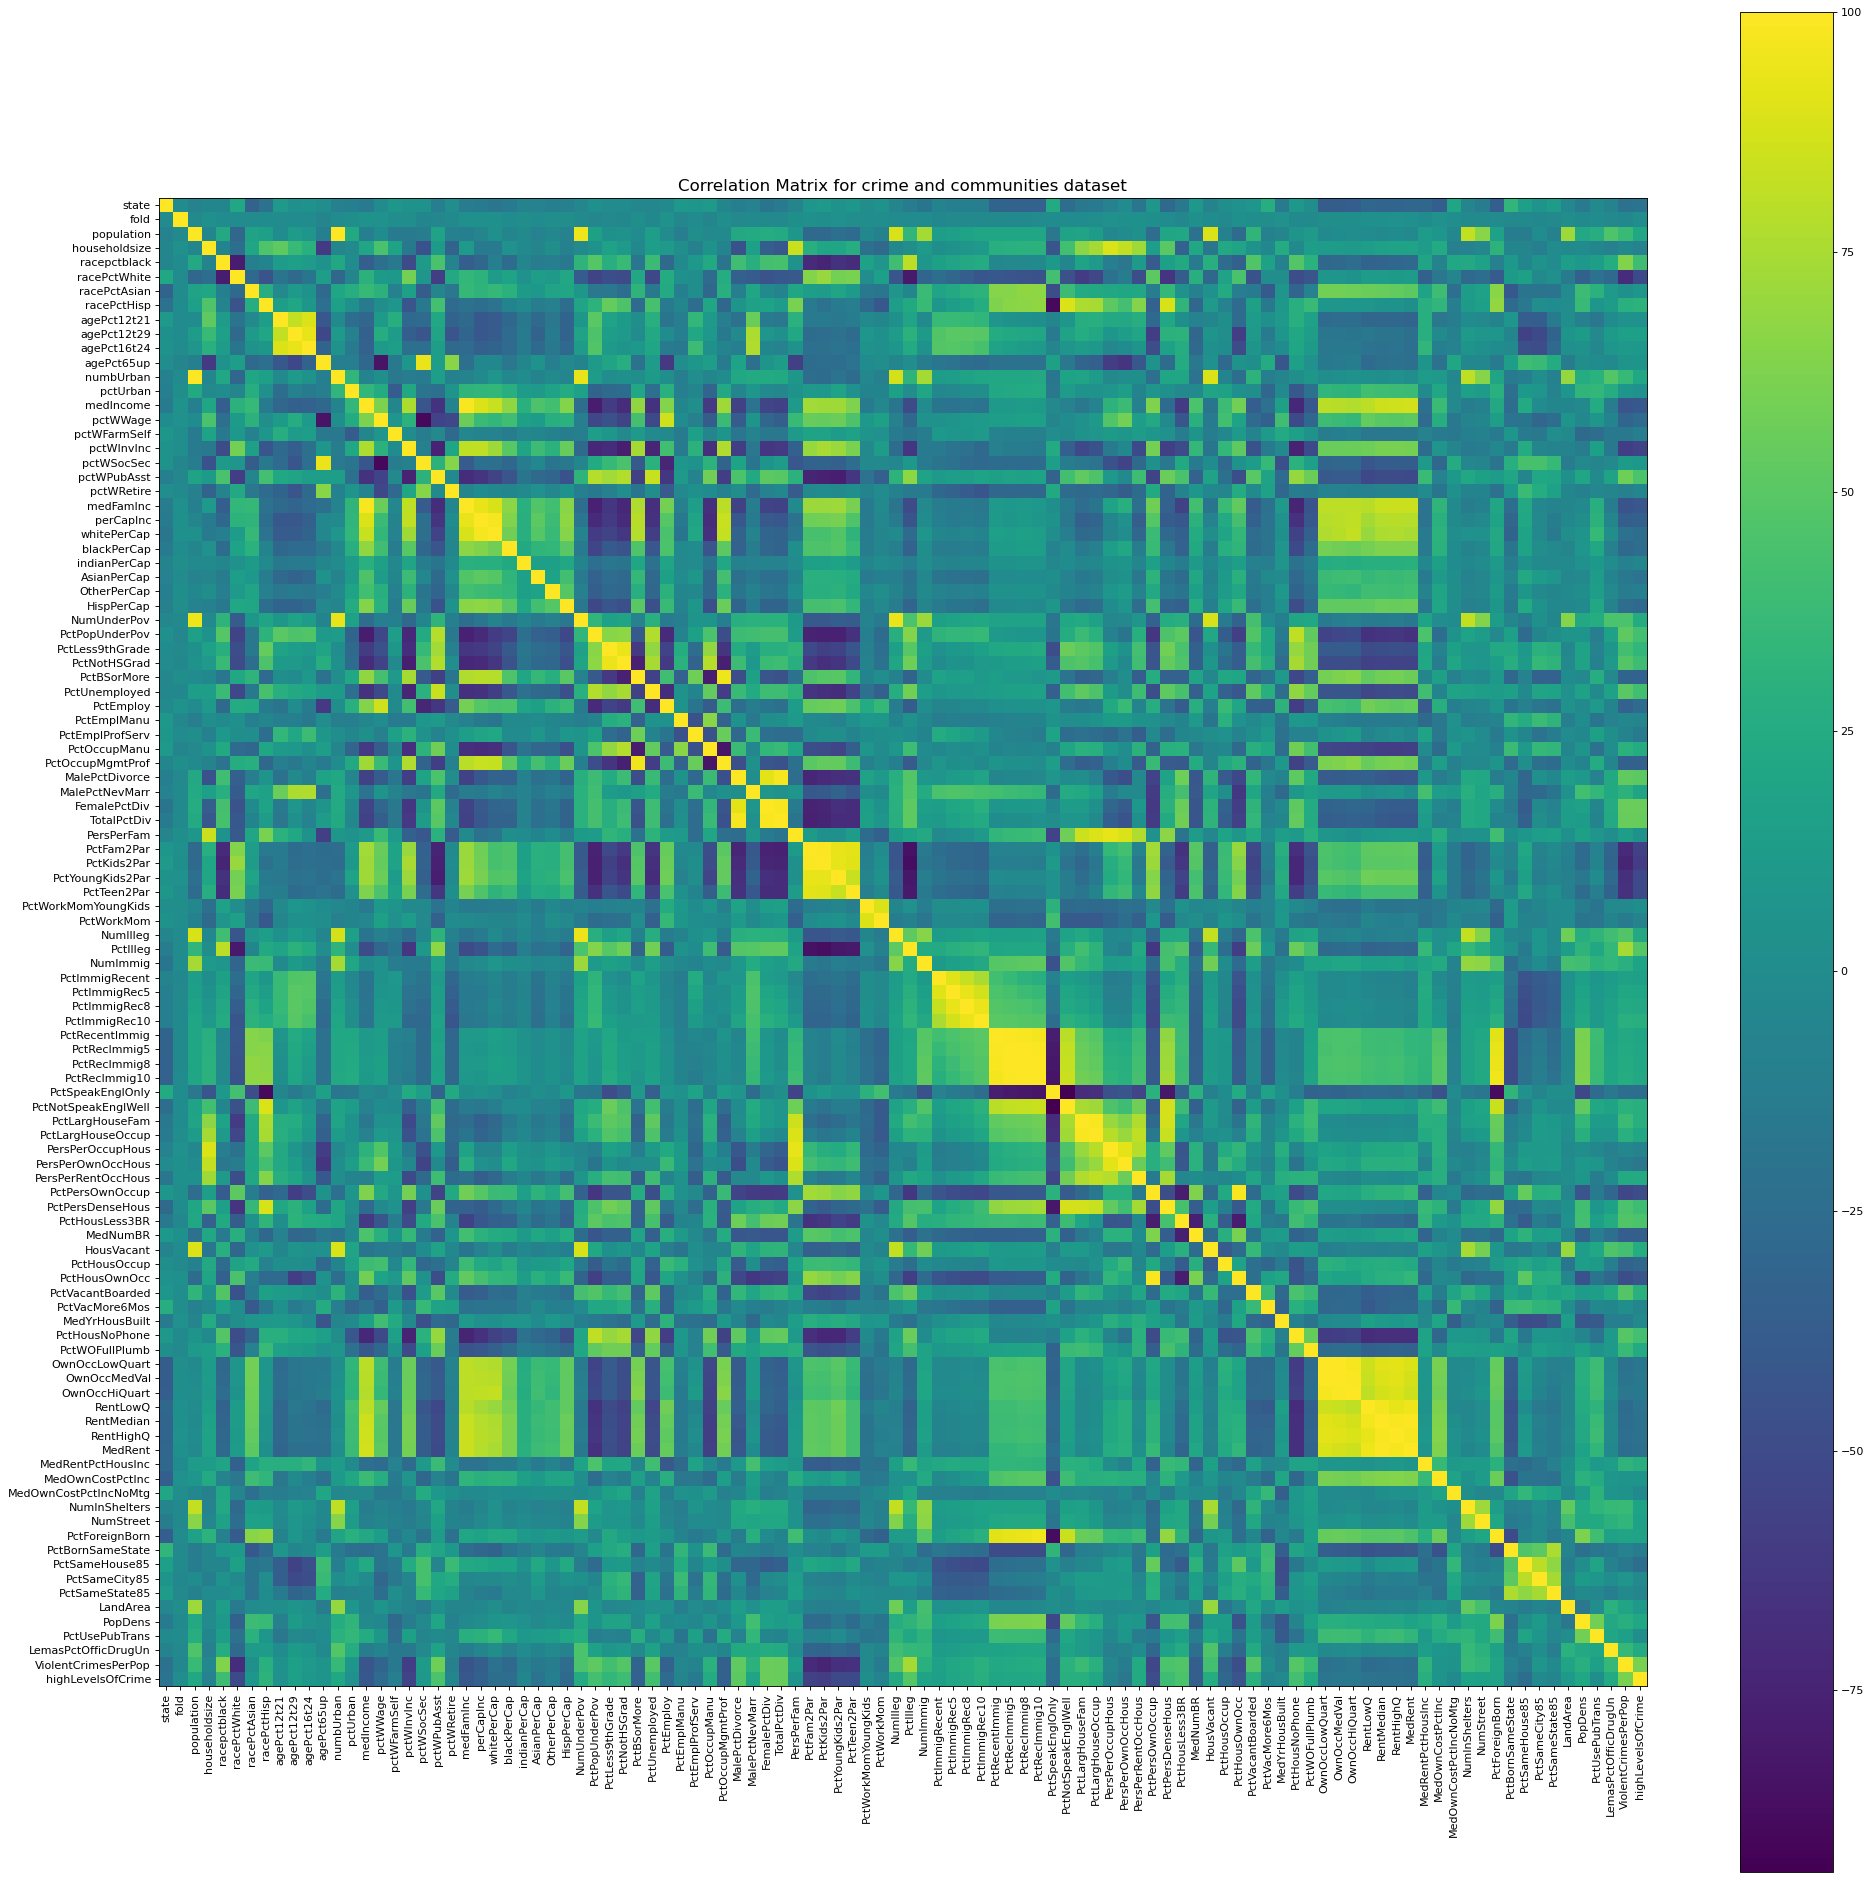

In [226]:
try:
    dataDf = pd.read_csv("crimedata.csv")
    dataDf['highLevelsOfCrime'] = dataDf.apply(defineHighCrime, axis=1)
except:
    print("failed to read in training data")
plotCorrelationMatrix(dataDf,30,'crime and communities dataset')

In [227]:
dataDf.describe() * 100

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,199300.000000,199300.000000,199300.000000,199300.000000,199300.000000,199300.000000,199300.000000,199300.000000,199300.000000,199300.000000,...,199300.000000,199300.000000,199300.000000,199300.000000,199300.000000,199300.000000,199300.000000,199300.000000,199300.000000,199300.000000
mean,2868.389363,549.623683,5.761164,46.343703,17.922730,75.398394,15.375314,14.408931,42.420973,49.391370,...,21.565479,60.877572,53.496739,62.632213,65.147015,6.524335,23.291019,16.174109,9.409935,23.798294
std,1640.166103,287.265023,12.693489,16.374715,25.287028,24.380741,20.890507,23.253057,15.523428,14.358413,...,23.114627,20.431418,18.135980,20.051983,19.825316,10.948517,20.312706,22.909861,24.037935,23.304331
min,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1200.000000,300.000000,1.000000,35.000000,2.000000,63.000000,4.000000,1.000000,34.000000,41.000000,...,6.000000,47.000000,42.000000,52.000000,56.000000,2.000000,10.000000,2.000000,0.000000,7.000000
50%,3400.000000,500.000000,2.000000,44.000000,6.000000,85.000000,7.000000,4.000000,40.000000,48.000000,...,13.000000,63.000000,54.000000,67.000000,70.000000,4.000000,17.000000,7.000000,0.000000,15.000000
75%,4200.000000,800.000000,5.000000,54.000000,23.000000,94.000000,17.000000,16.000000,47.000000,54.000000,...,28.000000,77.000000,66.000000,77.000000,79.000000,7.000000,28.000000,19.000000,0.000000,33.000000
max,5600.000000,1000.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


# visualize dataset

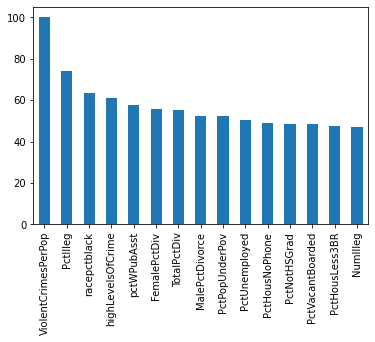

In [228]:
corr_matrix = dataDf.corr() * 100
corr_matrix = corr_matrix["ViolentCrimesPerPop"].sort_values(ascending=False).head(15)
for i in corr_matrix:
         corr_matrix.plot.bar(i)

# experiment with algorithms, feature sets, parameters, etc.,

Run through 1:


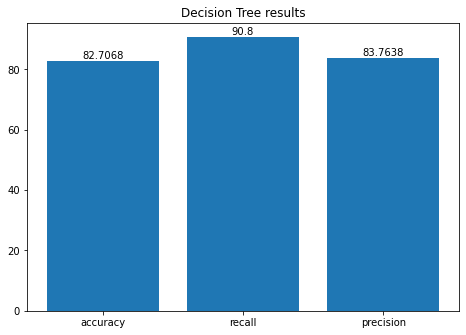

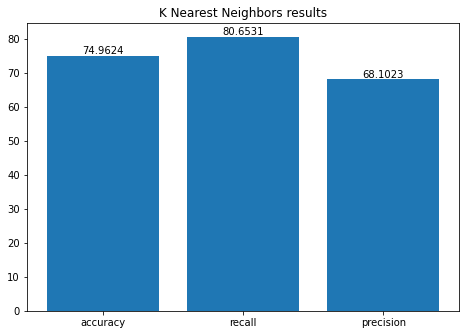

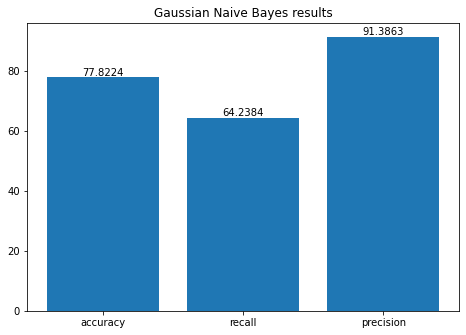

------------------------------------------------
Run through 2:
Features: Index(['PctIlleg', 'racepctblack', 'FemalePctDiv'], dtype='object')


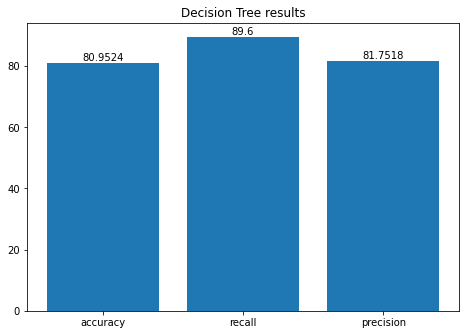

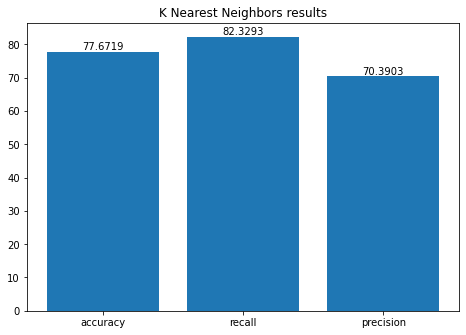

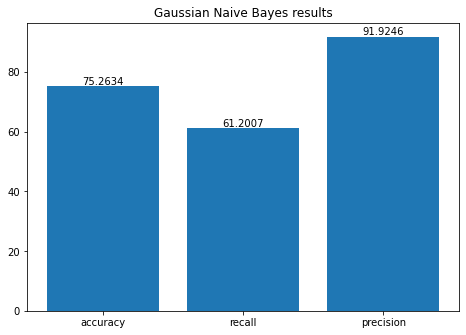

------------------------------------------------
Run through 3:
Features: Index(['pctWPubAsst', 'PctPopUnderPov', 'PctUnemployed'], dtype='object')


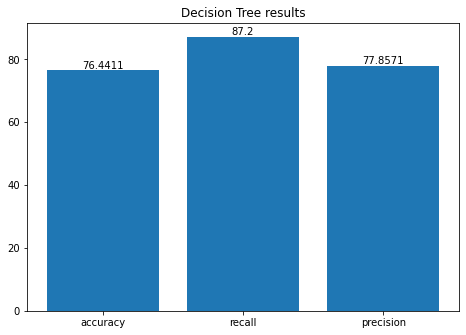

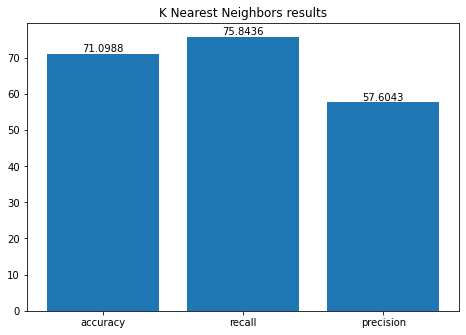

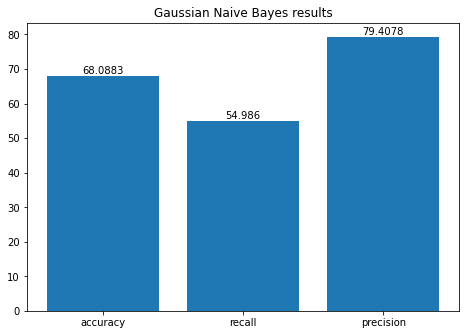

------------------------------------------------
Run through 4:
Features: Index(['pctWPubAsst', 'racepctblack', 'PctIlleg'], dtype='object')


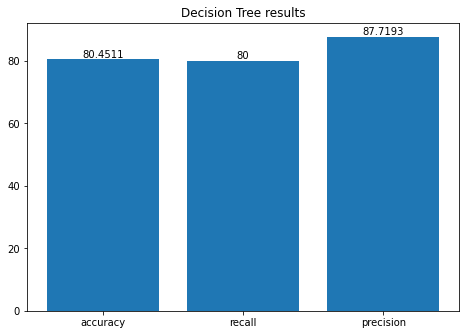

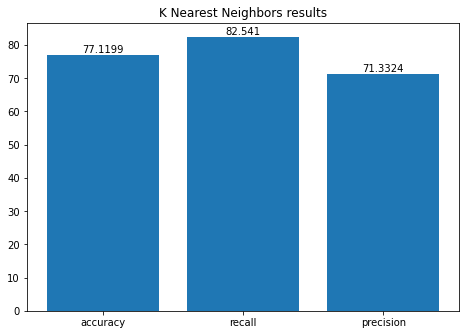

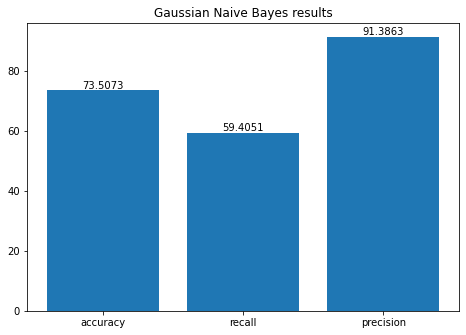

------------------------------------------------
Run through 5:
Features: Index(['PctPopUnderPov', 'racepctblack', 'MalePctDivorce'], dtype='object')


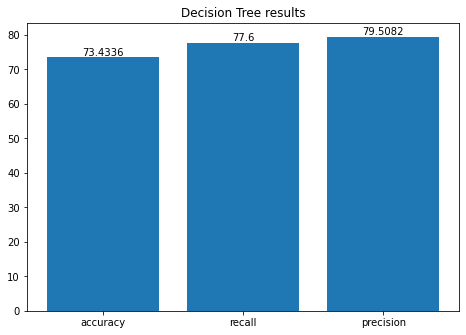

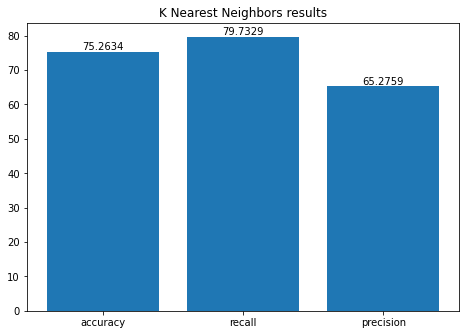

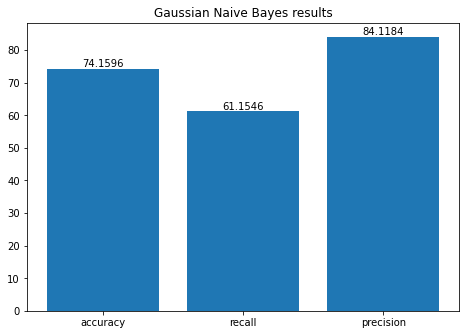

In [229]:
X = dataDf.drop(['state','communityname','highLevelsOfCrime','ViolentCrimesPerPop'],axis=1)
y = dataDf['highLevelsOfCrime']
print("Run through 1:")
DTGenerator(X,y,dT=None)
KNNGenerator(X,y,knn=None)
NBGenerator(X,y,gnb=None)
print("------------------------------------------------")
print("Run through 2:")
X1 = dataDf[['PctIlleg','racepctblack','FemalePctDiv']]
y1 = dataDf['highLevelsOfCrime']
print("Features:",X1.columns)
newDt = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=18)
newKNN = KNeighborsClassifier(n_neighbors=5)
newNb = GaussianNB()
Dt1 = DTGenerator(X1,y1,newDt)
KNNGenerator(X1,y1,newKNN)
NBGenerator(X1,y1,newNb)
print("------------------------------------------------")
print("Run through 3:")
X2 = dataDf[['pctWPubAsst','PctPopUnderPov','PctUnemployed']]
y2 = dataDf['highLevelsOfCrime']
print("Features:",X2.columns)
newDt2 = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=18)
newKNN2 = KNeighborsClassifier(n_neighbors=5)
newNb2 = GaussianNB()
DTGenerator(X2,y2,newDt2)
KNNGenerator(X2,y2,newKNN2)
NBGenerator(X2,y2,newNb2)
print("------------------------------------------------")
print("Run through 4:")
X3 = dataDf[['pctWPubAsst','racepctblack','PctIlleg']]
y3 = dataDf['highLevelsOfCrime']
print("Features:",X3.columns)
newDt3 = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=18)
newKNN3 = KNeighborsClassifier(n_neighbors=5)
newNb3 = GaussianNB()
Dt3 = DTGenerator(X3,y3,newDt3)
KNNGenerator(X3,y3,newKNN3)
NBGenerator(X3,y3,newNb3)
print("------------------------------------------------")
print("Run through 5:")
X4 = dataDf[['PctPopUnderPov','racepctblack','MalePctDivorce']]
y4 = dataDf['highLevelsOfCrime']
print("Features:",X4.columns)
newDt4 = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=18)
newKNN4 = KNeighborsClassifier(n_neighbors=5)
newNb4 = GaussianNB()
Dt4 = DTGenerator(X4,y4,newDt4)
KNNGenerator(X4,y4,newKNN4)
NBGenerator(X4,y4,newNb4)

# visualize experimental results

# See above cell.

# analyze / explain experimental results

Using all the features did not work as it caused overfitting, what did work was filtering all the features with the highest correlation and picking a few features from there. Not using the feature of ViolentCrimsPerPop as that would be too easy.

Three different models were tried from a Decision Tree, to Naive Bayes, as well as KNN neighbors. 

# conclusion 

...

The task at hand was to predict if an area had high levels of crime based on details of the population without knowing directly what levels of crime there were. The algorithim that gave me the best accuracy was the decision tree classifier.The features that gave me the best accuracy were the amount of illegeals aliens living in the area, the percentage of black amercians living there, as well as the percenttage of female divorce.This would be the case as blacks are shown to commit hihger rates of violent crime compared to other portions of the population, and women who are divorced tend to be easier targets comapred to women who are married.  